# Simulation of a Simple Quantum Optomechanical System using Functional Programming Paradigm

## The Heisenberg-Langevin Equations (HLE)

The Hamiltonian of a simple optomechanical system can be written as:
$$
H = - \hbar \Delta_{0} a^{\dagger} a + \hbar \omega_{m} b^{\dagger} b - \hbar g_{0} a^{\dagger} a \left( b^{\dagger} + b \right) + i \hbar A_{l} \left( a^{\dagger} - a \right),
$$
where $a$ ($b$) is the annihilation operator of the optical (mechanical) mode, $\Delta_{0}$ is the laser detuning, $\omega_{m}$ the mechanical resonance frequency, $g_{0}$ the optomechanical interaction strength and $A_{l}$ the laser amplitude.

In the linearized limit, this Hamiltonian can be:
* Classical complex-valued modes ($\alpha$, $\beta$) obeying coupled differential equations.
* Quantum real-valued quadratures ($X$, $Y$, $Q$, $P$) whose correlations obey a simple matrix equation.

The coupled differential equations are
$$
\frac{d \alpha}{d \tau} = - \left( \frac{\kappa^{\prime}}{2} - i \Delta_{0}^{\prime} \right) \alpha + i g_{0}^{\prime} \alpha \left( \beta^{*} + \beta \right) + A_{l}^{\prime}, \\
\frac{d \beta}{d \tau} = - \left( \frac{\gamma^{\prime}}{2} + i \right) \beta + i g_{0}^{\prime} \alpha^{*} \alpha,
$$
where $\kappa$ ($\gamma$) are the optical decay (mechanical damping) rates.
The prime superscript denotes normalization with $\omega_{m}$ with $\tau = \omega_{m} t$.

The equation of the quadrature correlation can be simplified as
$$
\frac{d V}{d \tau} = A^{\prime} V + V A^{\prime T} + D^{\prime},
$$
where $V = \frac{1}{2} \langle u_{j} u_{k} + u_{k} u_{j} \rangle$, with $u = (X, Y, Q, P)^{T}$, the normalized noise matrix $D^{\prime} = \mathrm{Diag}[\kappa^{\prime} / 2, \kappa^{\prime} / 2, \gamma^{\prime} (n_{th} + 1 / 2), \gamma^{\prime} (n_{th} + 1 / 2)]$ with $n_{th}$ being the thermal mechanical vibration quanta, and the normalized drift matrix $A^{\prime}$ is
$$
\begin{pmatrix}
    - \frac{\kappa^{\prime}}{2} & - \Delta^{\prime} & - 2 G_{0I}^{\prime} & 0 \\
    \Delta^{\prime} & - \frac{\kappa^{\prime}}{2} & 2 G_{0R}^{\prime} & 0 \\
    0 & 0 & - \frac{\gamma^{\prime}}{2} & \omega_{m}^{\prime} \\
    2 G_{0R}^{\prime} & 2 G_{0I}^{\prime} & - \omega_{m}^{\prime} & - \frac{\gamma^{\prime}}{2}
\end{pmatrix},
$$
where $\Delta^{\prime} = \Delta_{0}^{\prime} + g_{0}^{\prime} ( \beta^{*} + \beta )$ and $G_{0R}^{\prime}$ ($G_{0I}^{\prime}$) are the real (imaginary) parts of $G_{0}^{\prime} = g_{0}^{\prime} \alpha$.

## Classical Modes

To simulate the classical modes of the optomechanical systems, we interface two functions for:
* the initial values of the modes and the constants, and
* the rate of change of each mode given by the coupled differential equations.

We then interface these functions to the respective `get_ivc` and `get_mode_rates` methods of one of the classes `BaseSystem` (parent system), `SOSMSystem` (inherited system for single optical and single mechanical mode), `SODMSystem` (inherited system for single optical and double mechanical mode), `DOSMSystem` (inherited system for double optical and single mechanical mode), `DODMSystem` (inherited system for double optical and double mechanical mode) and `SOMASystem` (inherited system for an array with single optical and mechanical modes).

We then use the `get_modes_corrs_dynamics` or the `get_modes_corrs_stationary` methods to obtain the dynamical values or the stationary values of the modes.
Alternatively, the `get_measure_dynamics` or the `get_measure_stationary` methods can be used with `"measure_type"` set to `"mode_amp"` and `"idx_e"` set to `[0, 1]` (`0` and `1` represent the indices of the modes $\alpha$ and $\beta$).

The following script demonstrates this using the `SOSMSystem` class to obtain and compare the dynamical and stationary values of the modes.

MainThread               INFO    2022-09-23 10:26:28.664: (qom.ui.log) -------------------------------------------------Logger Initialized
MainThread               INFO    2022-09-23 10:26:28.729: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2022-09-23 10:26:28.735: (qom.systems.BaseSystem) --------------------------------------Measures Obtained	


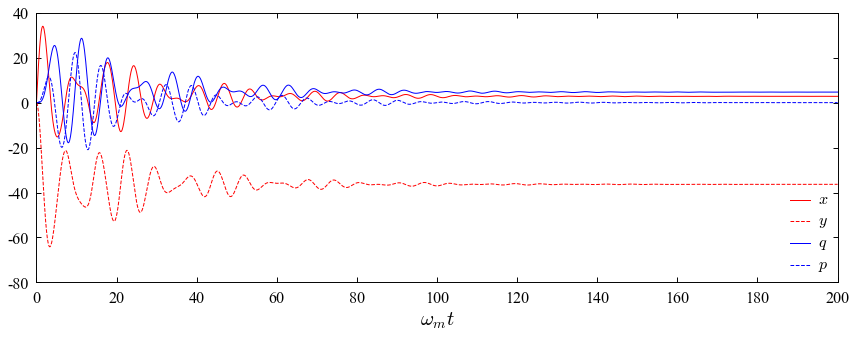

MainThread               INFO    2022-09-23 10:26:29.355: (qom.examples) ------------------------------------Stationary value of x:   2.82
MainThread               INFO    2022-09-23 10:26:29.356: (qom.examples) ------------------------------------Stationary value of y: -36.35
MainThread               INFO    2022-09-23 10:26:29.357: (qom.examples) ------------------------------------Stationary value of q:   4.70
MainThread               INFO    2022-09-23 10:26:29.357: (qom.examples) ------------------------------------Stationary value of p:   0.01


In [1]:
####################################################################################                              DEPENDENCIES                              ####
################################################################################

# dependencies
import logging
import numpy as np

# qom modules
from qom.systems import SOSMSystem
from qom.ui import init_log
from qom.ui.plotters import MPLPlotter

####################################################################################                               FUNCTIONS                                ####
################################################################################

# function to obtain the initial values and constants required for the IVP
def func_ivc():
    # extract frequently used variables
    A_l_prime       = 25.0
    Delta_0_prime   = -1.0
    g_0_prime       = 0.005
    gamma_prime     = 0.005
    kappa_prime     = 0.15

    # initial mode values as 1D list
    modes_0 = np.zeros(2, dtype=np.complex_).tolist()
    
    # normalized parameters
    params_ivp = [A_l_prime, Delta_0_prime, g_0_prime, gamma_prime, kappa_prime]

    return modes_0, params_ivp

# function to obtain the rates of the optical and mechanical modes.
def func_mode_rates(modes, params, t=None):
    # extract frequently used variables
    A_l_prime, Delta_0_prime, g_0_prime, gamma_prime, kappa_prime = params
    alpha, beta = modes

    # effective detuning
    Delta_prime = Delta_0_prime + 2 * g_0_prime * np.real(beta)

    # calculate mode rates
    dalpha_dt = - kappa_prime / 2 * alpha + 1j * Delta_prime * alpha + A_l_prime
    dbeta_dt = 1j * g_0_prime * np.conjugate(alpha) * alpha - gamma_prime / 2 * beta - 1j * beta
    # normalize
    mode_rates = [dalpha_dt, dbeta_dt]

    return mode_rates

####################################################################################                                SYSTEM                                  ####
################################################################################

# initialize logger
init_log()
logger = logging.getLogger('qom.examples')

# initialize system
system = SOSMSystem()
# set the functions to appropriate methods
system.get_ivc = func_ivc
system.get_mode_rates = func_mode_rates

####################################################################################                           DYNAMICAL VALUES                             ####
################################################################################

# parameters for the solver
solver_params = {
    'show_progress': True,
    'method': 'zvode',
    'cache': False,
    'measure_type': 'mode_amp',
    'idx_e': [0, 1],
    't_min': 0.0,
    't_max': 200.0,
    't_dim': 2001
}
# calculate dynamical values
Modes, T = system.get_measure_dynamics(solver_params=solver_params)
# # uncomment for alternative expression
# Modes, _, T = system.get_modes_corrs_dynamics(solver_params=solver_params)
# extract values
x_d = (np.sqrt(2) * np.real(np.transpose(Modes)[0])).tolist()
y_d = (np.sqrt(2) * np.imag(np.transpose(Modes)[0])).tolist()
q_d = (np.sqrt(2) * np.real(np.transpose(Modes)[1])).tolist()
p_d = (np.sqrt(2) * np.imag(np.transpose(Modes)[1])).tolist()
# display dynamical values
plotter = MPLPlotter(axes={
    'X': T,
    'Y': list(range(4))
}, params={
    'type': 'lines',
    'x_label': '$\\omega_{m} t$',
    'x_ticks': list(range(0, 201, 20)),
    'y_colors': ['r', 'r', 'b', 'b'],
    'y_styles': ['-', '--', '-', '--'],
    'y_legend': ['$x$', '$y$', '$q$', '$p$'],
    'v_ticks': list(range(-80, 41, 20)),
    'show_legend': True,
    'width': 12.0
})
plotter.update(xs=T, vs=[x_d, y_d, q_d, p_d])
plotter.show(hold=True)

####################################################################################                          STATIONARY VALUES                             ####
################################################################################

# parameters for the solver
solver_params = {
    'measure_type': 'mode_amp',
    'idx_e': [0, 1]
}
# calculate stationary values
modes = system.get_measure_stationary(solver_params=solver_params)
# # uncomment for alternative method
# modes, _ = system.get_modes_corrs_stationary(solver_params=solver_params)
# extract values
x_s = np.sqrt(2) * np.real(modes[0])
y_s = np.sqrt(2) * np.imag(modes[0])
q_s = np.sqrt(2) * np.real(modes[1])
p_s = np.sqrt(2) * np.imag(modes[1])
# display stationary values
logger.info('------------------------------------Stationary value of x: {:6.2f}\n'.format(x_s))
logger.info('------------------------------------Stationary value of y: {:6.2f}\n'.format(y_s))
logger.info('------------------------------------Stationary value of q: {:6.2f}\n'.format(q_s))
logger.info('------------------------------------Stationary value of p: {:6.2f}\n'.format(p_s))

We can also plot the phase-space trajectory of mechanical motion with the obtained dynamical values.

The following snippet illustrates this.
The final ($10 \times 2 \omega_{m} t$) values are marked in red.

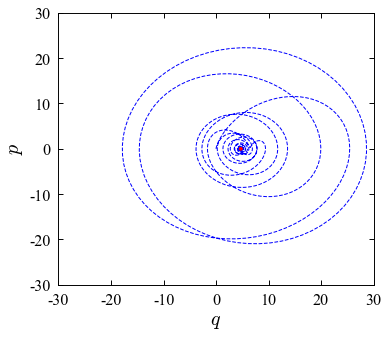

In [2]:
# display phase-space trajectory
plotter = MPLPlotter(axes={}, params={
    'type': 'lines',
    'x_label': '$q$',
    'x_ticks': list(range(-30, 31, 10)),
    'y_colors': ['b', 'r'],
    'y_sizes': [1, 2],
    'y_styles': ['--', '-'],
    'v_label': '$p$',
    'v_ticks': list(range(-30, 31, 10)),
    'width': 5.5
})
plotter.update(xs=[q_d, q_d[-628:]], vs=[p_d, p_d[-628:]])
plotter.show(True)

In the adiabatic limit ($\kappa \gg \gamma, g_{0}$), the classical modes can be expressed as stationary values 
$$
\alpha_{s} = \frac{A_{l}^{\prime}}{\frac{\kappa^{\prime}}{2} - i \Delta^{\prime}}, \\
\beta_{s} = \frac{i g_{0}^{\prime} \left| \alpha_{s} \right|^{2}}{\frac{\gamma^{\prime}}{2} + i}.
$$

These equations can be simplified as a cubic in $N_{o} = | \alpha_{s} |^{2}$ given by
$$
4 C^{\prime 2} N^{3} + 8 C^{\prime} \Delta_{0}^{\prime} N^{2} + \left( 4 \Delta_{0}^{\prime 2} + \kappa^{\prime 2} \right) N - 4 \left| A_{l}^{\prime} \right|^{2} = 0,
$$
where $C = 2 g_{0}^{\prime 2} / ( \gamma^{\prime 2} / 4 + 1 )$.

We can obtain the real solutions of this cubic equation which represent the values of $N_{o}$ by using the `get_mean_optical_occupancies` method.
This method requires the `get_oss_args` method defined for the system to obtain the parameters $A_{l}^{\prime}$, $\Delta_{0}^{\prime}$, $\kappa^{\prime}$ and $C^{\prime}$ defined in the cubic.

The following snippets illustrates the process of obtaining the mean optical occupancies.

In [3]:
# function to obtain the required parameters to calculate the optical steady state
def func_oss_args(params):
    # extract frequently used variables
    A_l_prime, Delta_0_prime, g_0_prime, gamma_prime, kappa_prime = params

    # coefficient of occupancy
    C_prime = 2 * g_0_prime**2 / (gamma_prime**2 / 4 + 1)
    
    return A_l_prime, Delta_0_prime, kappa_prime, C_prime

# add function to system method
system.get_oss_args = func_oss_args

# obtain and display mean optical occupancies
N_os, _ = system.get_mean_optical_occupancies()
logger.info('------------------------------------------Number of real roots: {}\n'.format(len(N_os)))
logger.info('N_os: {}\n'.format(N_os))

MainThread               INFO    2022-09-23 10:26:29.658: (qom.examples) ------------------------------------------Number of real roots: 3
MainThread               INFO    2022-09-23 10:26:29.659: (qom.examples) N_os: [22940.824128391057, 16394.715369270216, 664.7105023387211]


## Quantum Correlations

We can similarly plot the quantum dynamics of the optomechanical system by defining the initial values of the quadrature correlations along with the drift matrix and the noise matrix.

The following script demonstrates this by calculating the dynamical and stationary values of the variances in position and momentum of the mechanical mode, which correspond to the elements $V_{22}$ and $V_{33}$ respectively.

MainThread               INFO    2022-09-23 10:26:30.344: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2022-09-23 10:26:30.364: (qom.systems.BaseSystem) --------------------------------------Measures Obtained	


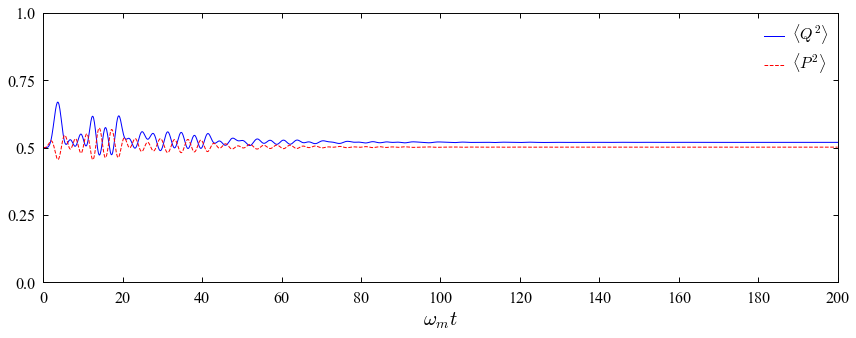

MainThread               INFO    2022-09-23 10:26:30.655: (qom.examples) -------------------Stationary value of Q_2_expect:   0.52
MainThread               INFO    2022-09-23 10:26:30.655: (qom.examples) -------------------Stationary value of P_2_expect:   0.50


In [4]:
####################################################################################                              DEPENDENCIES                              ####
################################################################################

# dependencies
import logging
import numpy as np

# qom modules
from qom.systems import SOSMSystem
from qom.ui import init_log
from qom.ui.plotters import MPLPlotter

####################################################################################                               FUNCTIONS                                ####
################################################################################

# function to obtain the normalized drift matrix
def func_A(modes, params, t=None):
    # extract frequently used variables
    A_l_prime, Delta_0_prime, g_0_prime, gamma_prime, kappa_prime = params
    alpha, beta = modes

    # effective values
    Delta_prime = Delta_0_prime + 2 * g_0_prime * np.real(beta)
    g_prime = g_0_prime * alpha

    # drift matrix
    A_prime = np.zeros((4, 4), dtype=np.float_)
    # X quadratures
    A_prime[0][0] = - kappa_prime / 2
    A_prime[0][1] = - Delta_prime
    A_prime[0][2] = - 2 * np.imag(g_prime)
    # Y quadratures
    A_prime[1][0] = Delta_prime
    A_prime[1][1] = - kappa_prime / 2
    A_prime[1][2] = 2 * np.real(g_prime)
    # Q quadratures
    A_prime[2][2] = - gamma_prime / 2
    A_prime[2][3] = 1.0
    # P quadratures
    A_prime[3][0] = 2 * np.real(g_prime)
    A_prime[3][1] = 2 * np.imag(g_prime)
    A_prime[3][2] = - 1.0
    A_prime[3][3] = - gamma_prime / 2

    return A_prime

# function to obtain the initial values and constants required for the IVP
def func_ivc():
    # extract frequently used variables
    A_l_prime       = 25.0
    Delta_0_prime   = -1.0
    g_0_prime       = 0.005
    gamma_prime     = 0.005
    kappa_prime     = 0.15
    n_th            = 0.0

    # initial mode values as 1D list
    modes_0 = np.zeros(2, dtype=np.complex_).tolist()

    # initial quadrature correlations
    corrs_0 = np.zeros((4, 4), dtype=np.float_)
    corrs_0[0][0] = 0.5
    corrs_0[1][1] = 0.5
    corrs_0[2][2] = n_th + 0.5
    corrs_0[3][3] = n_th + 0.5

    # convert to 1D list and concatenate all variables
    iv = modes_0 + [np.complex_(element) for element in corrs_0.flatten()]

    # normalized noise correlation matrix
    D_prime = np.zeros((4, 4), dtype=np.float_)
    D_prime[0][0] = kappa_prime / 2
    D_prime[1][1] = kappa_prime / 2
    D_prime[2][2] = gamma_prime * (2 * n_th + 1) / 2
    D_prime[3][3] = gamma_prime * (2 * n_th + 1) / 2
    
    # normalized parameters
    params_ivp = [A_l_prime, Delta_0_prime, g_0_prime, gamma_prime, kappa_prime]

    # all constants
    c = D_prime.flatten().tolist() + params_ivp

    return iv, c

# function to obtain the rates of the optical and mechanical modes.
def func_mode_rates(modes, params, t=None):
    # extract frequently used variables
    A_l_prime, Delta_0_prime, g_0_prime, gamma_prime, kappa_prime = params
    alpha, beta = modes

    # effective detuning
    Delta_prime = Delta_0_prime + 2 * g_0_prime * np.real(beta)

    # calculate mode rates
    dalpha_dt = - kappa_prime / 2 * alpha + 1j * Delta_prime * alpha + A_l_prime
    dbeta_dt = 1j * g_0_prime * np.conjugate(alpha) * alpha - gamma_prime / 2 * beta - 1j * beta
    # normalize
    mode_rates = [dalpha_dt, dbeta_dt]

    return mode_rates

####################################################################################                                SYSTEM                                  ####
################################################################################

# initialize logger
init_log()
logger = logging.getLogger('qom.examples')

# initialize system
system = SOSMSystem()
# set the functions to appropriate methods
system.get_A = func_A
system.get_ivc = func_ivc
system.get_mode_rates = func_mode_rates

####################################################################################                           DYNAMICAL VALUES                             ####
################################################################################

# parameters for the solver
solver_params = {
    'show_progress': True,
    'method': 'zvode',
    'cache': False,
    'measure_type': 'corr_ele',
    'idx_e': [(2, 2), (3, 3)],
    't_min': 0.0,
    't_max': 200.0,
    't_dim': 2001
}
# calculate dynamic values
Corrs, T = system.get_measure_dynamics(solver_params=solver_params)
# extract values
Q_2_expect_d = np.transpose(Corrs)[0].tolist()
P_2_expect_d = np.transpose(Corrs)[1].tolist()
# # uncomment for alternative expression
# _, Corrs, T = system.get_modes_corrs_dynamics(solver_params=solver_params)
# # extract values
# Q_2_expect_d = [corrs[2][2] for corrs in Corrs]
# P_2_expect_d = [corrs[3][3] for corrs in Corrs]
# display dynamical values
plotter = MPLPlotter(axes={
    'X': T,
    'Y': list(range(4))
}, params={
    'type': 'lines',
    'x_label': '$\\omega_{m} t$',
    'x_ticks': list(range(0, 201, 20)),
    'y_colors': ['b', 'r'],
    'y_styles': ['-', '--'],
    'y_legend': ['$\\langle Q^{2} \\rangle$', '$\\langle P^{2} \\rangle$'],
    'v_ticks': [0.0, 0.25, 0.5, 0.75, 1.0],
    'show_legend': True,
    'width': 12.0
})
plotter.update(xs=T, vs=[Q_2_expect_d, P_2_expect_d])
plotter.show(hold=True)

####################################################################################                          STATIONARY VALUES                             ####
################################################################################

# parameters for the solver
solver_params = {
    'measure_type': 'corr_ele',
    'idx_e': [(2, 2), (3, 3)]
}
# calculate stationary values
corrs = system.get_measure_stationary(solver_params=solver_params)
# extract values
Q_2_expect_s = corrs[0]
P_2_expect_s = corrs[1]
# # uncomment for alternative method
# _, corrs = system.get_modes_corrs_stationary(solver_params=solver_params)
# # extract values
# Q_2_expect_s = corrs[2][2]
# P_2_expect_s = corrs[3][3]
# display stationary values
logger.info('-------------------Stationary value of Q_2_expect: {:6.2f}\n'.format(Q_2_expect_s))
logger.info('-------------------Stationary value of P_2_expect: {:6.2f}\n'.format(P_2_expect_s))

We can also calculate quantum properties like Entanglement, Phase Synchronization and Discord using the `get_measure_dynamics` method with their corresponding measure codes and one or more pairs of mode indices.

The following snippet illustrates the calculation of the logarithmic negativity measure of entanglement between the optical and mechanical modes.

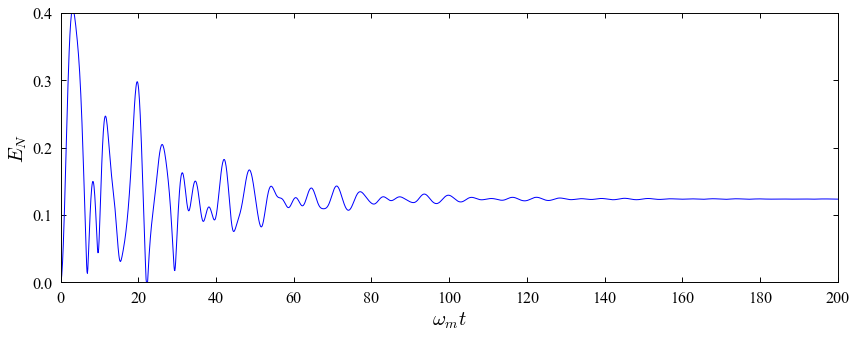

MainThread               INFO    2022-09-23 10:26:31.111: (qom.examples) ---------------------Stationary value of entan_ln:   0.12


In [5]:
# parameters for the solver
solver_params = {
    'measure_type': 'entan_ln',
    'idx_e': (0, 1)
}
# calculate and display dynamical value
Entan_ln, T = system.get_measure_dynamics(solver_params=solver_params)
plotter = MPLPlotter(axes={}, params={
    'type': 'lines',
    'x_label': '$\\omega_{m} t$',
    'x_ticks': list(range(0, 201, 20)),
    'y_colors': ['b'],
    'v_label': '$E_{N}$',
    'v_ticks': [0.0, 0.1, 0.2, 0.3, 0.4],
    'width': 12.0
})
plotter.update(xs=T, vs=np.transpose(Entan_ln)[0])
plotter.show(hold=True)
# calculate and display stationary value
entan_ln = system.get_measure_stationary(solver_params=solver_params)
logger.info('---------------------Stationary value of entan_ln: {:6.2f}\n'.format(entan_ln[0]))